In [1]:
import csv
import pandas as pd
import numpy as np
import pandas as pd
import re

In [2]:
import matplotlib.pyplot as plt

# Reading the tweets file 


In [3]:
tweets_file_df = pd.read_csv('stock_tweets.csv')

for index, row in tweets_file_df.iterrows():
    if row['Stock Name'] != 'TSLA':
        tweets_file_df.drop(index=index, inplace=True)

In [4]:
tweets_file_df

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
37417,2021-09-30 02:52:38+00:00,Playing in the dirt and #chasingsunsets\n@tesl...,TSLA,"Tesla, Inc."
37418,2021-09-30 02:40:26+00:00,I agree with @freshjiva that $TSLA ‘s EV busin...,TSLA,"Tesla, Inc."
37419,2021-09-30 01:59:02+00:00,Hold. On. Tight. $TSLA,TSLA,"Tesla, Inc."
37420,2021-09-30 01:38:26+00:00,Get ready for a $TSLA _ _ _ _ _ _ Q3 delivery...,TSLA,"Tesla, Inc."


In [5]:
# Dropping irrelavent columns.
tweets_file_df = tweets_file_df.drop(['Stock Name','Company Name'], axis=1)

# Converting the Date column into a date type instead of string type
tweets_file_df['Date'] = pd.to_datetime(tweets_file_df['Date'], dayfirst=True).dt.date

In [6]:
tweets_file_df.head(5)

,Date,Tweet
0,2022-09-29,Mainstream media has done an amazing job at br...
1,2022-09-29,Tesla delivery estimates are at around 364k fr...
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,..."


# Becuase there are many tweets on the same day we want to combine them and analyze thier sentiment

Cleaning the tweets from spaciel characters

In [7]:
# Cleaning the tweets from spaciel characters
temp = pd.DataFrame(columns=['Date', 'Tweet'])
for index, row in tweets_file_df.iterrows():
    temp_text = row['Tweet']
    my_new_string = re.sub('[^ a-zA-Z0-9]', "", temp_text)
    temp.loc[len(temp)] = [tweets_file_df.loc[index, 'Date'],my_new_string]
    
    
temp['Tweet'] = temp['Tweet'].map(lambda x: x.lstrip('.-'))

In [8]:
temp

,Date,Tweet
0,2022-09-29,Mainstream media has done an amazing job at br...
1,2022-09-29,Tesla delivery estimates are at around 364k fr...
2,2022-09-29,3 Even if I include 630M unvested RSUs as of 6...
3,2022-09-29,RealDanODowd WholeMarsBlog Tesla Hahaha why ar...
4,2022-09-29,RealDanODowd Tesla Stop trying to kill kids yo...
...,...,...
37417,2021-09-30,Playing in the dirt and chasingsunsetstesla el...
37418,2021-09-30,I agree with freshjiva that TSLA s EV business...
37419,2021-09-30,Hold On Tight TSLA
37420,2021-09-30,Get ready for a TSLA Q3 delivery number...


Preparing the data for the sentiment analyzer, creating a copy of the data frame and analyzing the sentiment for each tweet and entering its average

In [9]:
sentiment_full_df = temp[['Date','Tweet']].copy()

In [10]:
# Sentiment analyzer eveluate 4 values : Compound, Negative, Positive, Neutral, each value ranges from -1 to 1
sentiment_full_df["Comp"] = ''
sentiment_full_df["Negative"] = ''
sentiment_full_df["Neutral"] = ''
sentiment_full_df["Positive"] = ''

In [11]:
import unicodedata
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_i_a = SentimentIntensityAnalyzer()

for index, row in temp.iterrows():
    try:
        sentence_i = unicodedata.normalize('NFKD', temp.loc[index, 'Tweet'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        
        sentiment_full_df.at[index, 'Comp'] = sentence_sentiment['compound']
        sentiment_full_df.at[index, 'Negative'] = sentence_sentiment['neg']
        sentiment_full_df.at[index, 'Neutral'] = sentence_sentiment['neu']
        sentiment_full_df.at[index, 'Positive'] = sentence_sentiment['pos']
        
    except TypeError:
        print(sentiment_full_df.loc[index, 'Tweet'])
        print(index)

In [12]:
sentiment_full_df

,Date,Tweet,Comp,Negative,Neutral,Positive
0,2022-09-29,Mainstream media has done an amazing job at br...,0.0772,0.127,0.758,0.115
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,0.0,0.0,1.0,0.0
2,2022-09-29,3 Even if I include 630M unvested RSUs as of 6...,0.296,0.0,0.95,0.05
3,2022-09-29,RealDanODowd WholeMarsBlog Tesla Hahaha why ar...,-0.7096,0.264,0.597,0.139
4,2022-09-29,RealDanODowd Tesla Stop trying to kill kids yo...,-0.875,0.526,0.474,0.0
...,...,...,...,...,...,...
37417,2021-09-30,Playing in the dirt and chasingsunsetstesla el...,-0.1531,0.214,0.625,0.161
37418,2021-09-30,I agree with freshjiva that TSLA s EV business...,0.7003,0.078,0.712,0.21
37419,2021-09-30,Hold On Tight TSLA,0.0,0.0,1.0,0.0
37420,2021-09-30,Get ready for a TSLA Q3 delivery number...,0.3612,0.0,0.8,0.2


Calculating the average of each sentiment value : Comp, Negative, Neutral, Positive

Inserting the values of the averages to the new dataframe.

Eventually we will have one sentiment value for each date by his date tweets

In [13]:
dataframe = pd.DataFrame(columns=['Date','Comp','Negative','Neutral','Positive'])

count = 0
summ_comp = 0
summ_negative = 0
summ_neutral = 0
summ_positive = 0

for i in range(len(sentiment_full_df)-1):
    if sentiment_full_df.loc[i,'Date'] == sentiment_full_df.loc[i+1,'Date']:
        count += 1
        summ_comp += sentiment_full_df.loc[i,'Comp']
        summ_negative += sentiment_full_df.loc[i,'Negative']
        summ_neutral += sentiment_full_df.loc[i,'Neutral']
        summ_positive += sentiment_full_df.loc[i,'Positive']
    else:
        if count > 0:
            avg_comp = summ_comp / count
            avg_negative = summ_negative / count
            avg_neutral = summ_neutral / count
            avg_positive = summ_positive / count
            dataframe.loc[len(dataframe)] = [sentiment_full_df.loc[i,'Date'], avg_comp, avg_negative, avg_neutral, avg_positive]
        else:
            dataframe.loc[len(dataframe)] = [sentiment_full_df.loc[i,'Date'],
                                            sentiment_full_df.loc[i,'Comp'],
                                            sentiment_full_df.loc[i,'Negative'],
                                            sentiment_full_df.loc[i,'Neutral'],
                                            sentiment_full_df.loc[i,'Positive']]

        count=summ_comp=summ_negative=summ_neutral=summ_positive = 0 

# handle the last entry separately
if count > 0:
    avg_comp = summ_comp / count
    avg_negative = summ_negative / count
    avg_neutral = summ_neutral / count
    avg_positive = summ_positive / count
    dataframe.loc[len(dataframe)] = [sentiment_full_df.loc[i,'Date'], avg_comp, avg_negative, avg_neutral, avg_positive]
else:
    dataframe.loc[len(dataframe)] = [sentiment_full_df.loc[i,'Date'],
                                    sentiment_full_df.loc[i,'Comp'],
                                    sentiment_full_df.loc[i,'Negative'],
                                    sentiment_full_df.loc[i,'Neutral'],
                                    sentiment_full_df.loc[i,'Positive']]

In [14]:
dataframe

,Date,Comp,Negative,Neutral,Positive
0,2022-09-29,0.057715,0.077297,0.831514,0.091180
1,2022-09-28,0.146093,0.062905,0.837095,0.099986
2,2022-09-27,0.177362,0.041298,0.857298,0.101393
3,2022-09-26,0.156076,0.051789,0.829014,0.119155
4,2022-09-25,0.076609,0.062914,0.827943,0.109086
...,...,...,...,...,...
360,2021-10-04,0.114211,0.041653,0.869669,0.088669
361,2021-10-03,0.231675,0.041500,0.837850,0.120633
362,2021-10-02,0.245821,0.032391,0.838122,0.129522
363,2021-10-01,0.202494,0.035710,0.867484,0.096785


 # Adding the stock price data

In [15]:
stock_price = pd.read_csv('stock_prices/TSLA.csv')

In [16]:
stock_price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400
...,...,...,...,...,...,...,...
247,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400
248,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
249,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
250,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800


# Combining the stock price and the tweets date into one data frame

In [17]:
dataframe['Close Price'] = ''
for index_df, row_df in dataframe.iterrows():
    for index_price, row_price in stock_price.iterrows():
        if str(row_df['Date']) == str(row_price['Date']):
            dataframe.loc[index_df, 'Close Price'] = format(row_price['Adj Close'], '.2f')

In [18]:
dataframe

,Date,Comp,Negative,Neutral,Positive,Close Price
0,2022-09-29,0.057715,0.077297,0.831514,0.091180,268.21
1,2022-09-28,0.146093,0.062905,0.837095,0.099986,287.81
2,2022-09-27,0.177362,0.041298,0.857298,0.101393,282.94
3,2022-09-26,0.156076,0.051789,0.829014,0.119155,276.01
4,2022-09-25,0.076609,0.062914,0.827943,0.109086,
...,...,...,...,...,...,...
360,2021-10-04,0.114211,0.041653,0.869669,0.088669,260.51
361,2021-10-03,0.231675,0.041500,0.837850,0.120633,
362,2021-10-02,0.245821,0.032391,0.838122,0.129522,
363,2021-10-01,0.202494,0.035710,0.867484,0.096785,258.41


# Adding average prices to the blank cells in the Close Price column

some of the prices dont have a value becuase maybe its weekend or holiday which mean stock prices dont move but people tweet


In [19]:
# Assigning the value 0 to the blank cells and converting the column into a float type
for index, row in dataframe.iterrows():
        if row['Close Price'] == '':
            dataframe.loc[index, 'Close Price'] = 0
dataframe['Close Price'] = dataframe['Close Price'].astype(float)

In [20]:
n = 0
for i in range(len(dataframe)):
    if (dataframe.loc[i, 'Close Price'] == 0):
        flag = True
        n = i
        while flag:
            if (dataframe.loc[n+1,'Close Price'] == 0):
                n += 1
            else:
                num1 = float(dataframe.loc[i-1,'Close Price'])
                num2 = float(dataframe.loc[n+1,'Close Price'])
                avg = (num1+num2)/2
                dataframe.loc[i, 'Close Price'] = avg
                flag = False

In [21]:
dataframe

,Date,Comp,Negative,Neutral,Positive,Close Price
0,2022-09-29,0.057715,0.077297,0.831514,0.091180,268.210
1,2022-09-28,0.146093,0.062905,0.837095,0.099986,287.810
2,2022-09-27,0.177362,0.041298,0.857298,0.101393,282.940
3,2022-09-26,0.156076,0.051789,0.829014,0.119155,276.010
4,2022-09-25,0.076609,0.062914,0.827943,0.109086,275.670
...,...,...,...,...,...,...
360,2021-10-04,0.114211,0.041653,0.869669,0.088669,260.510
361,2021-10-03,0.231675,0.041500,0.837850,0.120633,259.460
362,2021-10-02,0.245821,0.032391,0.838122,0.129522,258.935
363,2021-10-01,0.202494,0.035710,0.867484,0.096785,258.410


In [27]:
# Reorder the columns - Close Price to be first and date last
dataframe = dataframe[['Close Price','Comp','Negative','Neutral','Positive','Date']]

In [23]:
dataframe.head(3)

,Date,Close Price,Comp,Negative,Neutral,Positive
0,2022-09-29,268.21,0.057715,0.077297,0.831514,0.091180
1,2022-09-28,287.81,0.146093,0.062905,0.837095,0.099986
2,2022-09-27,282.94,0.177362,0.041298,0.857298,0.101393


In [24]:
# sorting the dataframe by its date in ascending order
dataframe = dataframe.sort_values('Date', ascending=True)
dataframe.reset_index(drop=True, inplace=True)

In [25]:
dataframe

,Date,Close Price,Comp,Negative,Neutral,Positive
0,2021-09-30,258.490,0.197991,0.067202,0.811596,0.121202
1,2021-10-01,258.410,0.202494,0.035710,0.867484,0.096785
2,2021-10-02,258.935,0.245821,0.032391,0.838122,0.129522
3,2021-10-03,259.460,0.231675,0.041500,0.837850,0.120633
4,2021-10-04,260.510,0.114211,0.041653,0.869669,0.088669
...,...,...,...,...,...,...
360,2022-09-25,275.670,0.076609,0.062914,0.827943,0.109086
361,2022-09-26,276.010,0.156076,0.051789,0.829014,0.119155
362,2022-09-27,282.940,0.177362,0.041298,0.857298,0.101393
363,2022-09-28,287.810,0.146093,0.062905,0.837095,0.099986


# Creating a pie plot to show how many negative/positive/neutral tweets exist

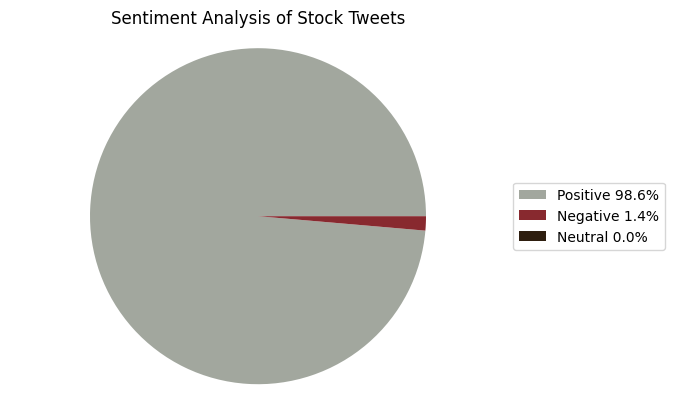

In [26]:
import matplotlib.pyplot as plt

posi = 0
nega = 0
neu = 0

for i in range(len(dataframe)):
    get_val = dataframe.Comp[i]
    if float(get_val) < 0:
        nega += 1
    if float(get_val) > 0:
        posi += 1
    if get_val == 0:
        neu += 1

posper = (posi / len(dataframe)) * 100
negper = (nega / len(dataframe)) * 100
neuper = (neu / len(dataframe)) * 100

labels = ['Positive', 'Negative', 'Neutral']
sizes = [posper, negper, neuper]
colors = ['#A2A79E', '#88292F', '#2E1E0F']

legend_labels = []
for label, size in zip(labels, sizes):
    legend_labels.append(f'{label} {size:.1f}%')

plt.pie(sizes, colors=colors)
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Sentiment Analysis of Stock Tweets")
plt.axis('equal')
plt.show()

# Predicting the price - machine learning using sklearn library

In [347]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

train data will be 70% of then values and tesing will be 30%

In [354]:
# Train data set
train = dataframe.loc[0:250]

X_train = train.drop(['Date','Close Price'],axis=1)
y_train = train['Close Price']

In [355]:
# Test data set 
test = dataframe.loc[251:365]

X_test = test.drop(['Date','Close Price'],axis=1)
y_test = test['Close Price']

In [356]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# X_train are the sentiment values such as Comp Negative... , y_train is the actual price for thos stats.
# So basically we are teaching the machine what is the stock price for each sentiment values.

RandomForestRegressor()

In [357]:
prediction = rf.predict(X_test) # we insert the test value and get the machine prediction, the reall prices are y_test so we compare them

In [358]:
plot_df = pd.DataFrame(columns=['Actual Price', 'Predicted_price'])

In [359]:
plot_df['Actual Price'] = y_test
plot_df['Predicted_price'] = prediction

In [360]:
plot_df

,Actual Price,Predicted_price
251,241.8700,307.093000
252,239.7100,320.481975
253,232.2300,334.723550
254,228.1075,341.750525
255,223.9850,324.497325
...,...,...
360,275.6700,317.836700
361,276.0100,310.014975
362,282.9400,327.775113
363,287.8100,298.085212


<Figure size 4000x4000 with 0 Axes>

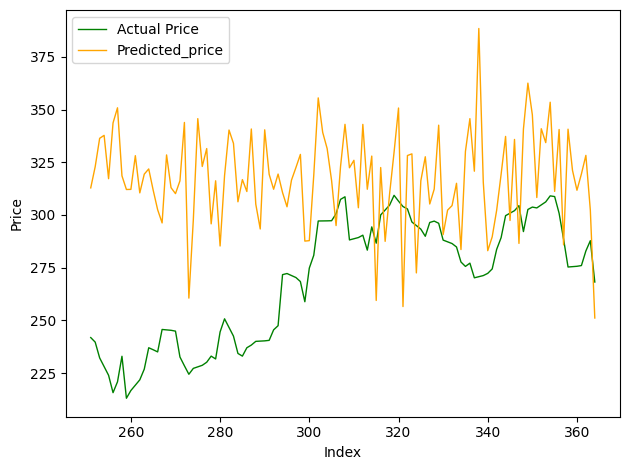

In [353]:
# Increase figure size
plt.figure(figsize=(40, 40))

# Plot the data with wider spacing
plot_df.plot(color=['green', 'orange'], linewidth=1)

# Set the axis labels
plt.xlabel('Index')
plt.ylabel('Price')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

# Conclusion

we give the machine the X_train data which is the sentiment values for the Comp, Neutral, Negative, Positive and we also pass 

the y_train which is the actual prices which matches those values.

Trough this procees we we thich the machine which sentiment values are equal to prices value so then when i enter aother 

sentiment values the machine wiil be able to predict whats the stock price will be.

Next we take the X_test and y_test which are also the sentiment values and prices and we compare the prediction of the sentiment 

values which is X_test and we compare them with y_test which are the actual values.

trough the grpah and the data frame , in this case of TSLA stock we cannot see a clear connection between the tweets and the 

stock price.